<a href="https://colab.research.google.com/github/mgonzalez8/ProyectoUNICEF/blob/master/MentisCare_UNICEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Proyecto UNICEF - Detección Temprana Intentos de Suicidio en estudiantes escolarizados de la ciudad de Buenaventura</h1>


**Integrantes**

Juan Manuel Hurtado
Manuel González González
Maria Elena Cordoba
Lilian Murillo Cordoba
Diana Vanessa Murillo Cordoba
Jose Laasalle
Aheenk Alexander Velez Hermann


**Cómo detectar de manera temprana los intentos de suicidios en estudiantes escolarizados en IE en la ciudad de Buenaventura?**

Con los datos que tenemos procedemos a realizar el modelo y prototipo que detecta de manera temprana los intentos de suicidios en los jovenes de la ciudad de Buenaventura

In [20]:
pip install geopandas

In [21]:
pip install -U imbalanced-learn

In [22]:
import pandas              as pd # The gold standard of Python data analysis, to create and manipulate tables of data
import numpy               as np # The Python module for processing arrays which/Pandas is based on
import matplotlib.pyplot   as plt # The gold standard of Python data visualization, but can be complex to use
import seaborn             as sns; sns.set() # A package to make Matplotlib visualizations more aesthetic
import branca
import geopandas


from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

import folium # package for making maps, please make sure to use a version older than 1.0.0.
from wordcloud import WordCloud # A package that will allow us to make a wordcloud
from scipy.stats import ttest_ind # A module for Python machine learning--we'll stick to T-Tests here
from IPython.display import display
from folium.plugins import TimeSliderChoropleth
# from time_slider_choropleth import TimeSliderChoropleth
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)

Exploración de patrones asociados a variables de interés.
Vamos a leer y ver nuestro conjunto de datos. Este conjunto de datos, Contiene los intentos de suicidios en Buenaventura, por edad, estrato, genero, nivel de escolaridad, antecedentes mentales, antecedentes por consumo, Problemas de Pareja, Muerte de un familiar, Problemas escolares, Suicidio de un familiar o amigo, Maltrato Fisico psicològico o sexual, Problemas familiares, Ideaciòn suicida, Plan suicida, transtornos depresivos, de personalidad, bipolaridad             entre otros factores.

Comenzamos con una exploración básica de la distribución de los distintos parámetros. Dado que este conjunto de datos se centra más en los datos categóricos, empezaremos por investigar las distintas frecuencias de cada categoría dentro de cada parámetro:

In [23]:
df = pd.read_csv('DataSetIntentosSuicidos.csv')
df.head(5)


,Nreg,Anio,Edad,Sexo,Estrato,Inten_Prev,Escolaridad,Prob_Parej,Muerte_Fam,Esco_Educ,...,Idea_Suici,Plan_Suici,Antec_Tran,Tran_Depre,Trast_Personalidad,Trast_bipolaridad,Esquizofre,Antec_v_a,Abuso_alco,Intento_Suic
0,1,2019,7,M,1,0,2,2,1,1,...,2,2,1,1,1,2,1,1,2,NO
1,2,2022,25,M,1,2,14,1,2,2,...,2,2,2,2,2,2,2,2,2,SI
2,3,2022,15,F,1,2,3,2,2,2,...,1,2,2,2,2,2,2,2,2,SI
3,4,2021,20,F,1,0,2,2,1,1,...,2,2,2,2,2,2,2,2,2,NO
4,5,2018,17,M,2,1,4,1,2,2,...,2,2,2,2,2,2,2,2,2,SI


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nreg                1333 non-null   int64 
 1   Anio                1333 non-null   int64 
 2   Edad                1333 non-null   int64 
 3   Sexo                1333 non-null   object
 4   Estrato             1333 non-null   int64 
 5   Inten_Prev          1333 non-null   int64 
 6   Escolaridad         1333 non-null   int64 
 7   Prob_Parej          1333 non-null   int64 
 8   Muerte_Fam          1333 non-null   int64 
 9   Esco_Educ           1333 non-null   int64 
 10  Suici_Fm_A          1333 non-null   int64 
 11  Maltr_Fps           1333 non-null   int64 
 12  Prob_Famil          1333 non-null   int64 
 13  Prob_Consu          1333 non-null   int64 
 14  Antec_Famil         1333 non-null   int64 
 15  Idea_Suici          1333 non-null   int64 
 16  Plan_Suici          1333

In [25]:
#Estamos mirando los valores únicos de sexo
pd.unique(df["Sexo"])

array(['M', 'F'], dtype=object)

In [26]:
#Estamos mirando los valores únicos de edaad
pd.unique(df["Edad"])

array([ 7, 25, 15, 20, 17, 21, 22, 16, 12,  8, 23, 36, 26, 14, 18,  9, 19,
       10, 45, 11, 48, 30, 32, 13, 34, 53, 24, 35, 46, 29, 37, 27, 28, 31,
       49, 58, 38, 55, 39, 33, 42, 47, 62, 41, 59, 50, 43, 72])

In [27]:
#Observamos la cantidad de nulos que tiene la columna
df["Edad"].isna().sum()

0

In [28]:
#Estamos mirando los valores únicos de estrato
pd.unique(df["Estrato"])

array([1, 2, 3])

In [29]:
#df['estrato'] = df['estrato'].replace(np.nan, 1)

In [30]:
#Estamos mirando los valores únicos de Anio
pd.unique(df["Anio"])

array([2019, 2022, 2021, 2018, 2020])

In [31]:
#Estamos mirando los valores únicos
#pd.unique(df["bar_ver"])

In [32]:
#df['bar_ver'] = df['bar_ver'].replace(np.nan,'SIN INFORMACION')

In [33]:
#Aqui tomo las columnas que me sirven para el problema
trainE = df[["Nreg","Anio","Edad","Sexo","Estrato","Inten_Prev","Escolaridad","Prob_Parej",	"Muerte_Fam",	"Esco_Educ",	"Suici_Fm_A",	"Maltr_Fps",	"Prob_Famil",	"Prob_Consu",	"Antec_Famil",	"Idea_Suici",	"Plan_Suici",	"Antec_Tran",	"Tran_Depre",	"Trast_Personalidad",	"Trast_bipolaridad",	"Esquizofre",	"Antec_v_a",	"Abuso_alco",	"Intento_Suic"]]

print(trainE.head(5))

   Nreg  Anio  Edad Sexo  Estrato  Inten_Prev  Escolaridad  Prob_Parej  \
0     1  2019     7    M        1           0            2           2   
1     2  2022    25    M        1           2           14           1   
2     3  2022    15    F        1           2            3           2   
3     4  2021    20    F        1           0            2           2   
4     5  2018    17    M        2           1            4           1   

   Muerte_Fam  Esco_Educ  ...  Idea_Suici  Plan_Suici  Antec_Tran  Tran_Depre  \
0           1          1  ...           2           2           1           1   
1           2          2  ...           2           2           2           2   
2           2          2  ...           1           2           2           2   
3           1          1  ...           2           2           2           2   
4           2          2  ...           2           2           2           2   

   Trast_Personalidad  Trast_bipolaridad  Esquizofre  Antec_v_a  Abu

In [34]:
trainE.isna().sum()

Nreg                  0
Anio                  0
Edad                  0
Sexo                  0
Estrato               0
Inten_Prev            0
Escolaridad           0
Prob_Parej            0
Muerte_Fam            0
Esco_Educ             0
Suici_Fm_A            0
Maltr_Fps             0
Prob_Famil            0
Prob_Consu            0
Antec_Famil           0
Idea_Suici            0
Plan_Suici            0
Antec_Tran            0
Tran_Depre            0
Trast_Personalidad    0
Trast_bipolaridad     0
Esquizofre            0
Antec_v_a             0
Abuso_alco            0
Intento_Suic          0
dtype: int64

In [35]:
#Trabajar las edades
#Realmente para facilitar encontrar patrones para la RN, es más util usar un rango de edad que una edad en un valor entero
trainE["Edad"] = pd.cut(trainE["Edad"],[0,5,10,15,20,25,30,35,40,45,50,60,70,100])

In [36]:
trainE.loc[:,"Sexo"],categoriaSex=pd.factorize(trainE["Sexo"], sort=True)
categoriaSex

<ipython-input-36-e47a831e6cf4>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  trainE.loc[:,"Sexo"],categoriaSex=pd.factorize(trainE["Sexo"], sort=True)


Index(['F', 'M'], dtype='object')

In [37]:
trainE.loc[:,"Anio"],categoriaAnio=pd.factorize(trainE["Anio"], sort=True)
categoriaAnio

Int64Index([2018, 2019, 2020, 2021, 2022], dtype='int64')

In [38]:
trainE.loc[:,"Edad"],categoriaAge=pd.factorize(trainE["Edad"], sort=True)
categoriaAge

<ipython-input-38-7f18a935ef9b>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  trainE.loc[:,"Edad"],categoriaAge=pd.factorize(trainE["Edad"], sort=True)


CategoricalIndex([  (5, 10],  (10, 15],  (15, 20],  (20, 25],  (25, 30],
                   (30, 35],  (35, 40],  (40, 45],  (45, 50],  (50, 60],
                   (60, 70], (70, 100]],
                 categories=[(0, 5], (5, 10], (10, 15], (15, 20], ..., (45, 50], (50, 60], (60, 70], (70, 100]], ordered=True, dtype='category')

In [39]:
trainE.loc[:,"Escolaridad"],categoriaEsc=pd.factorize(trainE["Escolaridad"], sort=True)
categoriaEsc

Int64Index([1, 2, 3, 4, 5, 7, 8, 9, 13, 14], dtype='int64')

In [40]:
trainE.loc[:,"Estrato"],categoriaEst=pd.factorize(trainE["Estrato"], sort=True)
categoriaEst

Int64Index([1, 2, 3], dtype='int64')

In [41]:
trainE.loc[:,"Inten_Prev"],categoriaInPr=pd.factorize(trainE["Inten_Prev"], sort=True)
categoriaInPr

Int64Index([0, 1, 2], dtype='int64')

In [42]:
trainE.loc[:,"Prob_Parej"],categoriaPrPa=pd.factorize(trainE["Prob_Parej"], sort=True)
categoriaPrPa

Int64Index([1, 2], dtype='int64')

In [43]:
trainE.loc[:,"Muerte_Fam"],categoriaMtFm=pd.factorize(trainE["Muerte_Fam"], sort=True)
categoriaMtFm

Int64Index([1, 2], dtype='int64')

In [44]:
trainE.loc[:,"Esco_Educ"],categoriaEsEd=pd.factorize(trainE["Esco_Educ"], sort=True)
categoriaEsEd

Int64Index([1, 2], dtype='int64')

In [45]:

trainE.loc[:,"Suici_Fm_A"],categoriaSuFmA=pd.factorize(trainE["Suici_Fm_A"], sort=True)
categoriaSuFmA

Int64Index([1, 2], dtype='int64')

In [46]:
trainE.loc[:,"Maltr_Fps"],categoriaMltFp=pd.factorize(trainE["Maltr_Fps"], sort=True)
categoriaMltFp

Int64Index([1, 2], dtype='int64')

In [47]:
trainE.loc[:,"Prob_Famil"],categoriaPrFa=pd.factorize(trainE["Prob_Famil"], sort=True)
categoriaPrFa

Int64Index([1, 2], dtype='int64')

In [48]:
trainE.loc[:,"Prob_Consu"],categoriaPrCon=pd.factorize(trainE["Prob_Consu"], sort=True)
categoriaPrCon

Int64Index([1, 2], dtype='int64')

In [49]:
trainE.loc[:,"Antec_Famil"],categoriaAnFa=pd.factorize(trainE["Antec_Famil"], sort=True)
categoriaAnFa

Int64Index([1, 2], dtype='int64')

In [50]:
trainE.loc[:,"Idea_Suici"],categoriaIdSu=pd.factorize(trainE["Idea_Suici"], sort=True)
categoriaIdSu

Int64Index([1, 2], dtype='int64')

In [51]:
trainE.loc[:,"Plan_Suici"],categoriaPlSu=pd.factorize(trainE["Plan_Suici"], sort=True)
categoriaPlSu

Int64Index([1, 2], dtype='int64')

In [52]:
trainE.loc[:,"Antec_Tran"],categoriaAnTr=pd.factorize(trainE["Antec_Tran"], sort=True)
categoriaAnTr

Int64Index([1, 2], dtype='int64')

In [53]:
trainE.loc[:,"Tran_Depre"],categoriaTrDe=pd.factorize(trainE["Tran_Depre"], sort=True)
categoriaTrDe

Int64Index([1, 2], dtype='int64')

In [54]:
trainE.loc[:,"Trast_Personalidad"],categoriaTrPer=pd.factorize(trainE["Trast_Personalidad"], sort=True)
categoriaTrPer

Int64Index([1, 2], dtype='int64')

In [55]:
trainE.loc[:,"Trast_bipolaridad"],categoriaTrBi=pd.factorize(trainE["Trast_bipolaridad"], sort=True)
categoriaTrBi

Int64Index([1, 2], dtype='int64')

In [56]:
trainE.loc[:,"Esquizofre"],categoriaEz=pd.factorize(trainE["Esquizofre"], sort=True)
categoriaEz

Int64Index([1, 2], dtype='int64')

In [57]:
trainE.loc[:,"Antec_v_a"],categoriaAntVA=pd.factorize(trainE["Antec_v_a"], sort=True)
categoriaAntVA

Int64Index([1, 2], dtype='int64')

In [58]:
trainE.loc[:,"Abuso_alco"],categoriaAbAl=pd.factorize(trainE["Abuso_alco"], sort=True)
categoriaAbAl

Int64Index([1, 2], dtype='int64')

In [59]:
trainE.loc[:,"Intento_Suic"],categoriaInSu=pd.factorize(trainE["Intento_Suic"], sort=True)
categoriaInSu

<ipython-input-59-b24ca830a5c4>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  trainE.loc[:,"Intento_Suic"],categoriaInSu=pd.factorize(trainE["Intento_Suic"], sort=True)


Index(['NO', 'SI'], dtype='object')

In [60]:
trainE.head()

,Nreg,Anio,Edad,Sexo,Estrato,Inten_Prev,Escolaridad,Prob_Parej,Muerte_Fam,Esco_Educ,...,Idea_Suici,Plan_Suici,Antec_Tran,Tran_Depre,Trast_Personalidad,Trast_bipolaridad,Esquizofre,Antec_v_a,Abuso_alco,Intento_Suic
0,1,1,0,1,0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0
1,2,4,3,1,0,2,9,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2,3,4,1,0,0,2,2,1,1,1,...,0,1,1,1,1,1,1,1,1,1
3,4,3,2,0,0,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,0
4,5,0,2,1,1,1,3,0,1,1,...,1,1,1,1,1,1,1,1,1,1


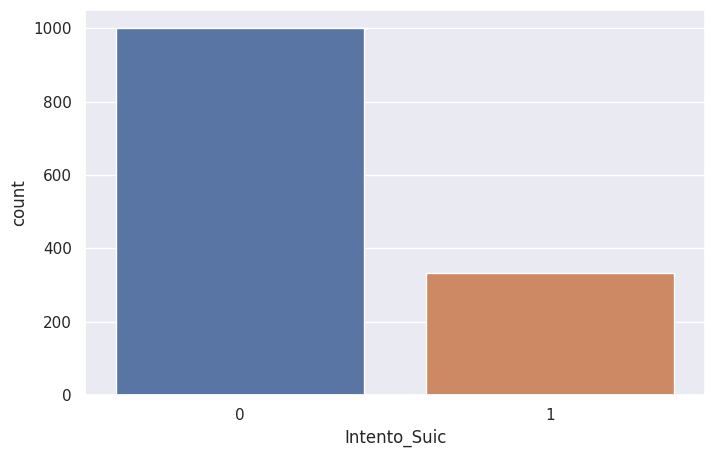

In [61]:
sns.countplot(x='Intento_Suic', data=trainE);

In [62]:
pip install -U imbalanced-learn

In [63]:
#VamosaNormalizar

x_train=trainE.iloc[:,0:24].values
y_train=trainE.iloc[:,24].values
x_train,y_train

(array([[   1,    1,    0, ...,    0,    0,    1],
        [   2,    4,    3, ...,    1,    1,    1],
        [   3,    4,    1, ...,    1,    1,    1],
        ...,
        [1331,    3,    1, ...,    0,    1,    0],
        [1332,    3,    4, ...,    1,    1,    1],
        [1333,    3,    0, ...,    1,    0,    1]]),
 array([0, 1, 1, ..., 0, 1, 0]))

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=0)

In [65]:
x_train=pd.DataFrame(x_train).iloc[:,1:24].values

x_train2=(pd.DataFrame(x_test)).iloc[:,0].values
x_test=pd.DataFrame(x_test).iloc[:,1:24].values
Resul=x_test
Resul

array([[2, 1, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [2, 5, 0, ..., 1, 1, 1],
       ...,
       [0, 2, 0, ..., 1, 1, 0],
       [3, 1, 0, ..., 1, 0, 0],
       [0, 2, 0, ..., 1, 1, 1]])

In [66]:
x_train

array([[3, 1, 0, ..., 1, 1, 1],
       [4, 1, 1, ..., 1, 0, 0],
       [4, 2, 1, ..., 1, 1, 0],
       ...,
       [2, 2, 1, ..., 1, 0, 1],
       [2, 1, 1, ..., 0, 0, 0],
       [0, 2, 1, ..., 1, 0, 0]])

In [67]:
x_test

array([[2, 1, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [2, 5, 0, ..., 1, 1, 1],
       ...,
       [0, 2, 0, ..., 1, 1, 0],
       [3, 1, 0, ..., 1, 0, 0],
       [0, 2, 0, ..., 1, 1, 1]])

In [68]:
x_train2

array([1158,  446,  459,  252, 1254,  153,  570,  774,  242,  382, 1000,
        225,  759,  472, 1187,  800,  994,  143, 1212,   53, 1264, 1026,
        689,    6,  109,   46,   32,  966,  945,  432,  162,   55, 1200,
         56,  269, 1247,  437, 1039,  427, 1268, 1017,  185,  441,  870,
       1094,  588,  542,  880,  884,  530,  992,  483, 1059,  443,  527,
       1227,  812, 1229,  738,  426,  905,  790,  255,  541,  568,  854,
        271,  991,  228, 1333, 1192, 1327,  518,  254,  507, 1052, 1060,
       1126,  513, 1231, 1230, 1002,  506,  327,  537,  394,  993,  657,
        924,  205,  903,   19,  590,  478,  299,   54,  329, 1123,  501,
         48,  304, 1170, 1130, 1171, 1057, 1014,  453, 1104,  872, 1143,
       1193,  620, 1138, 1122,  907,  633,  847,   86,   40,  964,  675,
        609, 1065,  784,  436,  160,    2,  987,  514,  203,  318,  502,
       1250,   59,  142,  536,  468,  413,  581,  316, 1282,  212, 1159,
        704,  487,  187,   15,  365, 1063, 1305,  6

In [69]:
ResulTado=pd.DataFrame(x_train2)
ResulTado

,0
0,1158
1,446
2,459
3,252
4,1254
...,...
395,197
396,741
397,184
398,1294


In [70]:
x_test

array([[2, 1, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [2, 5, 0, ..., 1, 1, 1],
       ...,
       [0, 2, 0, ..., 1, 1, 0],
       [3, 1, 0, ..., 1, 0, 0],
       [0, 2, 0, ..., 1, 1, 1]])

In [71]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[ 0.57661801, -0.55422913, -0.86819318, ...,  0.49060319,
         0.8234425 ,  0.79622577],
       [ 1.27348926, -0.55422913,  1.15181739, ...,  0.49060319,
        -1.21441388, -1.25592518],
       [ 1.27348926,  0.09538868,  1.15181739, ...,  0.49060319,
         0.8234425 , -1.25592518],
       ...,
       [-0.12025324,  0.09538868,  1.15181739, ...,  0.49060319,
        -1.21441388,  0.79622577],
       [-0.12025324, -0.55422913,  1.15181739, ..., -2.03830717,
        -1.21441388, -1.25592518],
       [-1.51399573,  0.09538868,  1.15181739, ...,  0.49060319,
        -1.21441388, -1.25592518]])

In [72]:
x_test=scaler.transform(x_test)
x_test

array([[-0.12025324, -0.55422913,  1.15181739, ..., -2.03830717,
         0.8234425 ,  0.79622577],
       [-1.51399573, -0.55422913, -0.86819318, ...,  0.49060319,
        -1.21441388,  0.79622577],
       [-0.12025324,  2.04424212, -0.86819318, ...,  0.49060319,
         0.8234425 ,  0.79622577],
       ...,
       [-1.51399573,  0.09538868, -0.86819318, ...,  0.49060319,
         0.8234425 , -1.25592518],
       [ 0.57661801, -0.55422913, -0.86819318, ...,  0.49060319,
        -1.21441388, -1.25592518],
       [-1.51399573,  0.09538868, -0.86819318, ...,  0.49060319,
         0.8234425 ,  0.79622577]])

In [73]:
#aplicamos la clasificacion por algortmos Bayesianos - naivebayes
from sklearn.naive_bayes import GaussianNB
#C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
#gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#kernel=['rbf','linear']
clasificadorNB = GaussianNB()
clasificadorNB.fit(x_train,y_train)
y_preditNB=clasificadorNB.predict(x_test)

In [74]:
y_preditNB

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [75]:
from sklearn.metrics import confusion_matrix
cmNB=confusion_matrix(y_test,y_preditNB)
cmNB

array([[299,   0],
       [  3,  98]])

In [76]:
x_train2

array([1158,  446,  459,  252, 1254,  153,  570,  774,  242,  382, 1000,
        225,  759,  472, 1187,  800,  994,  143, 1212,   53, 1264, 1026,
        689,    6,  109,   46,   32,  966,  945,  432,  162,   55, 1200,
         56,  269, 1247,  437, 1039,  427, 1268, 1017,  185,  441,  870,
       1094,  588,  542,  880,  884,  530,  992,  483, 1059,  443,  527,
       1227,  812, 1229,  738,  426,  905,  790,  255,  541,  568,  854,
        271,  991,  228, 1333, 1192, 1327,  518,  254,  507, 1052, 1060,
       1126,  513, 1231, 1230, 1002,  506,  327,  537,  394,  993,  657,
        924,  205,  903,   19,  590,  478,  299,   54,  329, 1123,  501,
         48,  304, 1170, 1130, 1171, 1057, 1014,  453, 1104,  872, 1143,
       1193,  620, 1138, 1122,  907,  633,  847,   86,   40,  964,  675,
        609, 1065,  784,  436,  160,    2,  987,  514,  203,  318,  502,
       1250,   59,  142,  536,  468,  413,  581,  316, 1282,  212, 1159,
        704,  487,  187,   15,  365, 1063, 1305,  6

In [77]:
y_preditNB

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [78]:
ResulTado["Intento_Suic"]=pd.DataFrame(y_preditNB)
ResulTado

,0,Intento_Suic
0,1158,0
1,446,1
2,459,1
3,252,0
4,1254,0
...,...,...
395,197,0
396,741,0
397,184,0
398,1294,0


In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
rocNB=roc_auc_score(y_test,y_preditNB)
rocNB

0.9851485148514851

In [80]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_preditNB))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       299
           1       1.00      0.97      0.98       101

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [81]:
scoreNB=clasificadorNB.score(x_test,y_test)
scoreNB

0.9925

In [82]:
score=clasificadorNB.score(x_train,y_train)
score

0.9892818863879957

In [83]:
#aplicamos la clasificacio por algortmos de Regresion - Regresion Logistica
from sklearn.linear_model import LogisticRegression
#penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
clasificadorLR = LogisticRegression(solver = 'saga',penalty='l2',random_state=0)
clasificadorLR.fit(x_train,y_train)
y_preditLR=clasificadorLR.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [84]:

cmLR=confusion_matrix(y_test,y_preditLR)
cmLR

array([[299,   0],
       [  3,  98]])

In [85]:
print (classification_report(y_test,y_preditLR))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       299
           1       1.00      0.97      0.98       101

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [86]:
scoreLR=clasificadorLR.score(x_test,y_test)
scoreLR

0.9925

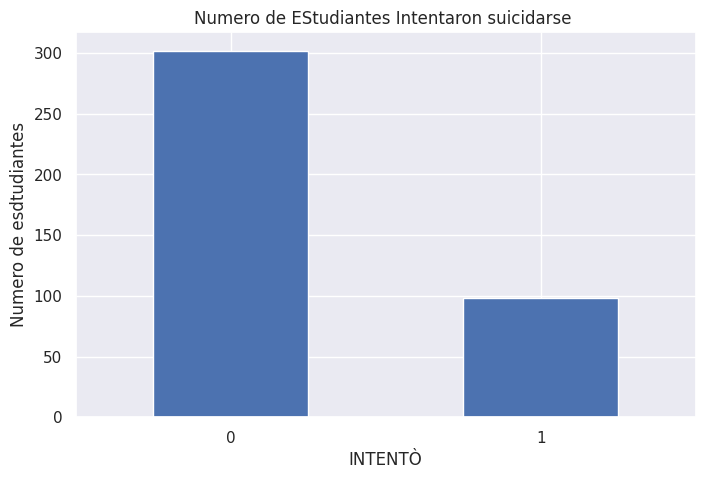

In [87]:
count_classes = pd.value_counts(y_preditLR, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Numero de EStudiantes Intentaron suicidarse ")
plt.xlabel("INTENTÒ")
plt.ylabel("Numero de esdtudiantes");

In [88]:
ResulTado["Intento_Suic"]=pd.DataFrame(y_preditLR)
ResulTado

,0,Intento_Suic
0,1158,0
1,446,1
2,459,1
3,252,0
4,1254,0
...,...,...
395,197,0
396,741,0
397,184,0
398,1294,0


In [89]:
#aplicamos la clasificacio por algoritmos de Arbol de Decisión - Arboles de Clasificación
from sklearn.tree import DecisionTreeClassifier
clasificadorDT = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.0)
clasificadorDT.fit(x_train,y_train)
y_preditDT=clasificadorDT.predict(x_test)

In [90]:
cmDT=confusion_matrix(y_test,y_preditDT)
cmDT

array([[294,   5],
       [  3,  98]])

In [91]:
print (classification_report(y_test,y_preditDT))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       299
           1       0.95      0.97      0.96       101

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.98      0.98       400



In [92]:
scoreDT=clasificadorDT.score(x_test,y_test)
scoreDT

0.98

In [93]:
ResulTado["Intento_Suic"]=pd.DataFrame(y_preditDT)
ResulTado

,0,Intento_Suic
0,1158,0
1,446,1
2,459,1
3,252,0
4,1254,0
...,...,...
395,197,0
396,741,0
397,184,0
398,1294,0


In [94]:
#aplicamos la clasificacio por algoritmos Algoritmos basados en Instancia - k-Nearest Neighbor (kNN) minkowski, manhattan,euclidean
from sklearn.neighbors import KNeighborsClassifier
clasificadorKNN = KNeighborsClassifier(n_neighbors= 11, metric="euclidean",p=2)
clasificadorKNN.fit(x_train,y_train)
y_preditKNN=clasificadorKNN.predict(x_test)

In [95]:
cmKNN=confusion_matrix(y_test,y_preditKNN)
cmKNN

array([[297,   2],
       [  1, 100]])

In [96]:
print (classification_report(y_test,y_preditKNN))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       299
           1       0.98      0.99      0.99       101

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [97]:
scoreKNN=clasificadorKNN.score(x_test,y_test)
scoreKNN

0.9925

In [98]:
ResulTado["Intento_Suic"]=pd.DataFrame(y_preditKNN)
ResulTado

,0,Intento_Suic
0,1158,0
1,446,1
2,459,1
3,252,0
4,1254,0
...,...,...
395,197,0
396,741,0
397,184,0
398,1294,0


In [99]:
#aplicamos la clasificacion algoritmos Algoritmo - SVC
from sklearn.svm import SVC
clasificadorSVC = SVC(kernel = "sigmoid", random_state = 0, gamma="auto")
clasificadorSVC.fit(x_train, y_train)
# Predicción de los resultados con el Conjunto de Testing
y_preditSVC  = clasificadorSVC.predict(x_test)

In [100]:
cmSVC=confusion_matrix(y_test,y_preditSVC)
cmSVC


array([[299,   0],
       [  3,  98]])

In [101]:
print (classification_report(y_test,y_preditSVC))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       299
           1       1.00      0.97      0.98       101

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [102]:
scoreSVC=clasificadorSVC.score(x_test,y_test)
scoreSVC

0.9925

In [103]:
ResulTado["Intento_Suic"]=pd.DataFrame(y_preditSVC)
ResulTado

,0,Intento_Suic
0,1158,0
1,446,1
2,459,1
3,252,0
4,1254,0
...,...,...
395,197,0
396,741,0
397,184,0
398,1294,0


In [104]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
clasificadorRFC = RandomForestClassifier(n_estimators = 10, max_depth=None, min_samples_split = 2, min_samples_leaf = 1, criterion = "entropy", verbose=2, random_state=42, n_jobs = -1)
clasificadorRFC.fit(x_train, y_train)
# Predicción de los resultados con el Conjunto de Testing
y_preditRFC = clasificadorRFC.predict(x_test)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [105]:
cmRFC=confusion_matrix(y_test,y_preditRFC)
print(cmRFC)

[[299   0]
 [  2  99]]


In [106]:
print (classification_report(y_test,y_preditRFC))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       299
           1       1.00      0.98      0.99       101

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



In [107]:
scoreRFC=clasificadorRFC.score(x_test,y_test)
scoreRFC

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


0.995

In [108]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Use la cuadrícula aleatoria para buscar los mejores hiperparámetros
# Primero cree el modelo base para sintonizar
# Búsqueda aleatoria de parámetros, usando 3 veces la validación cruzada,
# busque en 100 combinaciones diferentes y use todos los núcleos disponibles

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Ajuste el modelo de búsqueda aleatoria
rf_random.fit (x_train, y_train)
y_preditRFCV = rf_random.predict(x_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [110]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [111]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    print(predictions)
    errors = abs(predictions - y_test)
    print(errors)
    #mape = 100 * np.mean(errors / y_test)
    mape = np.mean(errors / y_test)
    print(mape)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

[0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.
 1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.1 0.
 1.  1.  0.  1.  0.1 1.  0.  1.  1.  1.  0.  0.1 1.  0.  0.3 0.  0.  0.
 0.3 0.  0.  0.  0.  0.  0.  0.1 0.  1.  0.  0.  0.1 0.  0.  0.  1.  0.
 1.  0.  0.1 0.1 0.  0.1 0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.
 0.  0.  0.  0.  1.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
 1.  0.  0.  0.  0.1 1.  0.  0.  0.2 1.  1.  0.3 0.  0.  0.  0.  0.2 0.1
 1.  1.  0.  0.  0.1 1.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.3 0.
 0.1 0.  0.  1.  0.1 0.2 0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.2 0.  0.
 0.  0.  0.1 0.1 1.  0.1 0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.
 0.  1.  0.6 0.  0.  0.4 0.  0.  0.  1.  1.  0.1 0.1 0.  0.  0.  0.  0.2
 0.  0.  1.  0.1 0.  0.  0.  0.1 0.  1.  0.  0.  0.  1.  0.  1

<ipython-input-111-b5e3c8f543b0>:7: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(errors / y_test)
<ipython-input-111-b5e3c8f543b0>:7: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(errors / y_test)


In [112]:
ResulTado["Intento_Suic"]=pd.DataFrame(y_preditRFC)
ResulTado.head(23)

,0,Intento_Suic
0,1158,0
1,446,1
2,459,1
3,252,0
4,1254,0
5,153,0
6,570,0
7,774,1
8,242,1
9,382,1
